In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("2_emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.shape

(5172, 3002)

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB
None


In [6]:
# step 2: data preprocessing
# check for missing values
print("Missing Values: ", df.isnull().sum().sum()) # expecting 0 for clean data

Missing Values:  0


In [7]:
# step 3: Separate the feature X (email text) and the target y (spam label).

X = df.drop(["Email No.", "Prediction"], axis=1) #ip
y = df["Prediction"]  #op


In [8]:
set(X.dtypes)

{dtype('int64')}

<Axes: xlabel='Prediction', ylabel='count'>

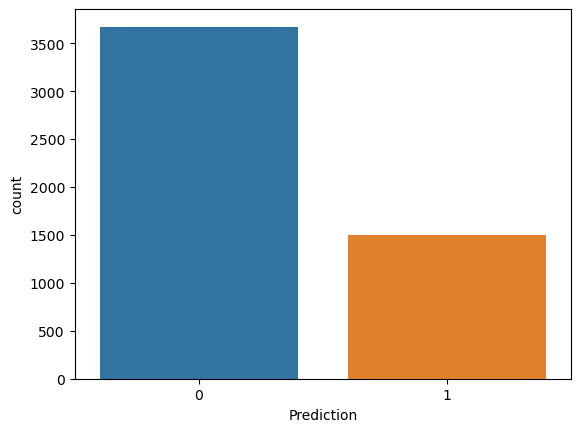

In [9]:
sns.countplot(x=y)

In [10]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [11]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [13]:
# # 3. Split the dataset into training and testing sets (75% training, 25% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

In [14]:
X_train.shape


(3879, 3000)

In [15]:
X_test.shape

(1293, 3000)

In [16]:
#  K-Nearest Neighbors (KNN) Model

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred_knn = knn.predict(X_test)

In [18]:
# Evalution 

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

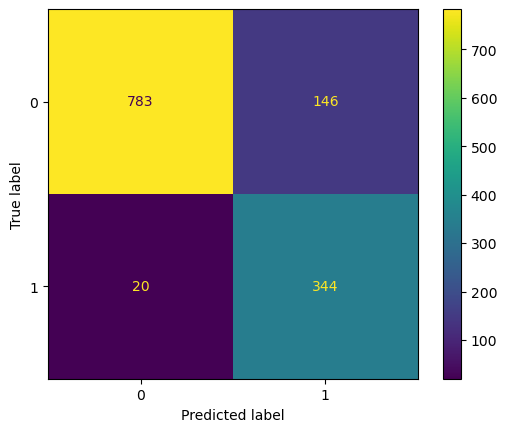

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

In [20]:
y_test.value_counts()

Prediction
0    929
1    364
Name: count, dtype: int64

In [21]:
# Evaluate KNN
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.871616395978345
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293

KNN Confusion Matrix:
 [[783 146]
 [ 20 344]]


In [22]:
# SVM

from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train,y_train)


SVC(kernel='linear')

In [23]:
y_pred_svm = svm.predict(X_test)  # Predict on test data

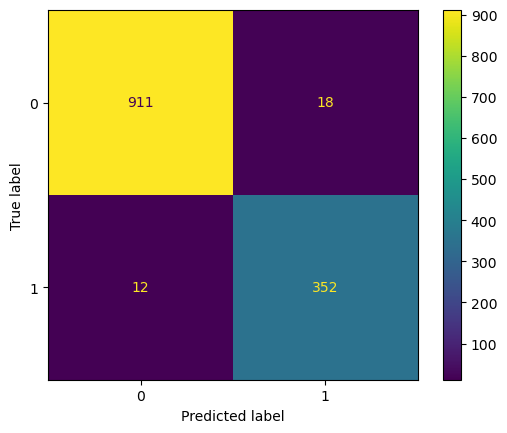

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)

In [25]:
# Evaluate SVM
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



SVM Accuracy: 0.9767981438515081
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       929
           1       0.95      0.97      0.96       364

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293

SVM Confusion Matrix:
 [[911  18]
 [ 12 352]]


In [26]:
# =========================extra========================

In [27]:
# knn improvement 

import numpy as np

error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error.append(np.mean(pred != y_test))

In [28]:
error

[0.10827532869296211,
 0.10982211910286156,
 0.12296983758700696,
 0.11523588553750967,
 0.12838360402165508,
 0.1214230471771075,
 0.15158546017014696,
 0.14849187935034802,
 0.17246713070378963,
 0.16705336426914152,
 0.1871616395978345,
 0.18329466357308585,
 0.21500386697602475,
 0.21345707656612528,
 0.22815158546017014,
 0.2266047950502707,
 0.23588553750966745,
 0.23356535189481825,
 0.2459396751740139,
 0.24361948955916474,
 0.2559938128383604,
 0.2552204176334107,
 0.2699149265274555,
 0.2691415313225058,
 0.2822892498066512,
 0.28306264501160094,
 0.2954369682907966,
 0.2923433874709977,
 0.3039443155452436,
 0.300077339520495,
 0.30549110595514306,
 0.30549110595514306,
 0.31245166279969067,
 0.31245166279969067,
 0.3194122196442382,
 0.317092034029389,
 0.32637277648878577,
 0.32559938128383603,
 0.33410672853828305,
 0.3325599381283836]

In [29]:
# knn with n=1 as it has least error

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [30]:
# Evaluate KNN
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Accuracy: 0.8917246713070379
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       929
           1       0.77      0.88      0.82       364

    accuracy                           0.89      1293
   macro avg       0.86      0.89      0.87      1293
weighted avg       0.90      0.89      0.89      1293

KNN Confusion Matrix:
 [[833  96]
 [ 44 320]]


In [31]:
# SVM other kernel

svm = SVC(kernel='rbf') 
svm.fit(X_train, y_train)  
y_pred_svm = svm.predict(X_test) 

print("\nSVM(RBF) Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM(RBF) Accuracy: 0.9450889404485692
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       929
           1       0.97      0.83      0.90       364

    accuracy                           0.95      1293
   macro avg       0.95      0.91      0.93      1293
weighted avg       0.95      0.95      0.94      1293

SVM Confusion Matrix:
 [[919  10]
 [ 61 303]]


In [32]:
# 2. kernel = poly

svm = SVC(kernel='poly') 
svm.fit(X_train, y_train)  
y_pred_svm = svm.predict(X_test) 

print("\nSVM(poly) Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM(poly) Accuracy: 0.7548337200309359
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85       929
           1       0.80      0.17      0.28       364

    accuracy                           0.75      1293
   macro avg       0.77      0.58      0.57      1293
weighted avg       0.76      0.75      0.69      1293

SVM Confusion Matrix:
 [[913  16]
 [301  63]]


In [33]:
# SVM

# linear = 97%  ===best
# rbf = 94 %
# poly = 75 %